In [53]:
# http://leananalyticsbook.com/one-metric-that-matters/
# https://v4-alpha.getbootstrap.com/content/code/
# https://fizzle.co/sparkline/vanity-vs-actionable-metrics



import pandas as pd
import numpy as np
import uuid
from datetime import datetime
from dateutil.relativedelta import relativedelta
# set the settingWithCopyWarning in Pandas to None
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [54]:
# number of device uuids 
num_device_uuids = 1000

# number of months per device uuid
num_months = 20

# starting month of app usage data
start_month = '2016-01-01'


# usage features
feature_usage_ratio = 0.8
num_usage_features = 3

# segmentation features
num_segmentation_featues = 3
platforms = ['iOS', 'Android']
countries = ['NL', 'AU', 'FR']
user_registered = [True, False]


device_uuids_limit = num_device_uuids # 200

### 1. Generating device uuids

In [101]:
uuids = pd.Series([str(uuid.uuid4()) for i in range(1,num_device_uuids)])
user_data = pd.DataFrame()
user_data['device_uuid'] = pd.Series(uuids).repeat(num_months)
user_data =user_data.reset_index().drop('index', 1)

In [102]:
user_data

,device_uuid
0,bdf92591-92e7-4a58-890d-4410621d03ef
1,bdf92591-92e7-4a58-890d-4410621d03ef
2,bdf92591-92e7-4a58-890d-4410621d03ef
3,bdf92591-92e7-4a58-890d-4410621d03ef
4,bdf92591-92e7-4a58-890d-4410621d03ef
5,bdf92591-92e7-4a58-890d-4410621d03ef
6,bdf92591-92e7-4a58-890d-4410621d03ef
7,bdf92591-92e7-4a58-890d-4410621d03ef
8,bdf92591-92e7-4a58-890d-4410621d03ef
9,bdf92591-92e7-4a58-890d-4410621d03ef


### 2. Generate dates

In [103]:
start_month_ts = pd.to_datetime(start_month)
end_month_ts = start_month_ts + relativedelta(months=+num_months - 1)
str(start_month_ts), str(end_month_ts)

('2016-01-01 00:00:00', '2017-08-01 00:00:00')

In [104]:
months = pd.Series(pd.date_range(start_month_ts, end_month_ts, freq='MS'))
months

0    2016-01-01
1    2016-02-01
2    2016-03-01
3    2016-04-01
4    2016-05-01
5    2016-06-01
6    2016-07-01
7    2016-08-01
8    2016-09-01
9    2016-10-01
10   2016-11-01
11   2016-12-01
12   2017-01-01
13   2017-02-01
14   2017-03-01
15   2017-04-01
16   2017-05-01
17   2017-06-01
18   2017-07-01
19   2017-08-01
dtype: datetime64[ns]

In [105]:
user_data.head()

,device_uuid
0,bdf92591-92e7-4a58-890d-4410621d03ef
1,bdf92591-92e7-4a58-890d-4410621d03ef
2,bdf92591-92e7-4a58-890d-4410621d03ef
3,bdf92591-92e7-4a58-890d-4410621d03ef
4,bdf92591-92e7-4a58-890d-4410621d03ef


In [106]:
user_data['date'] = pd.concat([months] * num_device_uuids, axis=0).reset_index().drop('index', 1)

In [109]:
user_data.head()

,device_uuid,date
0,bdf92591-92e7-4a58-890d-4410621d03ef,2016-01-01
1,bdf92591-92e7-4a58-890d-4410621d03ef,2016-02-01
2,bdf92591-92e7-4a58-890d-4410621d03ef,2016-03-01
3,bdf92591-92e7-4a58-890d-4410621d03ef,2016-04-01
4,bdf92591-92e7-4a58-890d-4410621d03ef,2016-05-01


### 3. Generate usage features

In [11]:
device_uuids = pd.Series(user_data['device_uuid'].unique())
user_data_with_usage = pd.DataFrame()

In [12]:
device_uuids[0:5]

0    001aa2ab-3705-4a5e-aa82-d69fc20e77a2
1    0031d125-1145-4a6c-aec8-b5a4fcad3cf0
2    00637ef1-5221-4429-87d4-d393e18005fa
3    006cd6a6-57ec-4812-a898-6b95df025fdf
4    0078c00d-83cc-465a-a9de-5c5ccca6080f
dtype: object

In [13]:
# extrac the names for each feature based on the pre-set number of feature
features = ['feature' + str(i) for i in range(1,num_usage_features+1)]

In [14]:
# generate random usage data for each feature and simulate falling usage per feature
# (each feature 80% of the previous one)
# example: F1 = 1, F2 = F1*0.8 = 0.8, F3 = F2*0.8 = 0.64

usage_features_ratio = {}

# set the feature_ratio for the first feature (100%)
cur_feature = 1.0

for feature in features:
    usage_features_ratio[feature] = float("{0:.1f}".format(cur_feature))
    cur_feature*= 0.8

usage_features_ratio

{'feature1': 1.0, 'feature2': 0.8, 'feature3': 0.6}

#### 4.1. Assign cohort groups to device_uuids

In [15]:
# 10 months = 5 cohorts, 11 months = 5 cohorts
num_cohorts = int(10 / 2) 
num_cohorts

5

In [16]:
num_cohorts = int(num_months / 2) 

# assign cohorts to users randomly (when did the device_uuid first used the app?)
cohorts = pd.DataFrame()
cohorts['device_uuid'] = device_uuids
cohorts['cohort_group'] = np.random.randint(low=0, high=num_cohorts, size=num_device_uuids-1)
cohorts.head()

,device_uuid,cohort_group
0,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,5
1,0031d125-1145-4a6c-aec8-b5a4fcad3cf0,5
2,00637ef1-5221-4429-87d4-d393e18005fa,4
3,006cd6a6-57ec-4812-a898-6b95df025fdf,8
4,0078c00d-83cc-465a-a9de-5c5ccca6080f,0


In [17]:
# number of users per cohort (number of months for the cut-off point)
cohorts['cohort_group'].value_counts()

2    110
7    109
8    105
9    104
1     98
3     97
5     96
6     95
0     94
4     91
Name: cohort_group, dtype: int64

#### 4.2. Creating usage features

In [77]:
# finding cohort groups for each device_uuid
user_data_with_cohort_groups = pd.DataFrame()

for device_uuid in device_uuids:
    
    # 1. slice user_data, create a device_uuid data for each user
    device_uuid_data = user_data[user_data['device_uuid'] == device_uuid]
    
    # 2. find cohort group of the device_uui and delete all unnecessary months
    device_uuid_cohort_group = int(cohorts[cohorts['device_uuid'] == device_uuid]['cohort_group'])
    device_uuid_data = device_uuid_data[device_uuid_cohort_group:]

    user_data_with_cohort_groups = user_data_with_cohort_groups.append(device_uuid_data)

In [78]:
len(user_data_with_cohort_groups) / len(device_uuids)
# len(user_data) / len(device_uuids)

15.433433433433434

In [79]:
# 3.1. - Generate random data for Feature1

user_data_with_cohort_groups = user_data_with_cohort_groups.reset_index().drop('index', axis=1)

user_data_with_cohort_groups[features[0]] = pd.Series((
        np.random.randint(low=0, high=14, 
                          size=len(user_data_with_cohort_groups))))

# 3.2. - Generate data for remaining features (Feature2, Feature3...)
for feature in features[1:]:
        user_data_with_cohort_groups[feature] = user_data_with_cohort_groups[features[0]] * usage_features_ratio[feature]
        
user_data_with_cohort_groups.head()

,device_uuid,date,feature1,feature2,feature3
0,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-06-01,10,8.0,6.0
1,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-07-01,1,0.8,0.6
2,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-08-01,2,1.6,1.2
3,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-09-01,13,10.4,7.8
4,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-10-01,13,10.4,7.8


In [80]:
user_data_with_usage_features = pd.DataFrame()

# 4.- Churner stays a churner

for device_uuid in device_uuids:
    
    churner = False
            
    device_uuid_data = user_data_with_cohort_groups[user_data_with_cohort_groups['device_uuid'] == device_uuid]
    
    
    for index, row in device_uuid_data.iterrows():
        
        if row[features[0]] == 0:
            churner = True

        if churner == True:
            # if a churner, set the value of all usage features to 0
            device_uuid_data.loc[index, features[0:]] = 0
    
    # print(device_uuid_data)
            
    user_data_with_usage_features = user_data_with_usage_features.append(device_uuid_data)
    
# delete the months when with churned device_uuid months
user_data_with_usage_features = user_data_with_usage_features[user_data_with_usage_features[features[0]] != 0]

In [81]:
user_data_with_usage_features.head()

,device_uuid,date,feature1,feature2,feature3
0,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-06-01,10,8.0,6.0
1,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-07-01,1,0.8,0.6
2,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-08-01,2,1.6,1.2
3,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-09-01,13,10.4,7.8
4,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-10-01,13,10.4,7.8


In [82]:
# average number of months of usage per device_uuid
len(user_data_with_usage_features) / len(device_uuids)

8.464464464464465

In [83]:
num_months

20

### 4. Generate segmentation features

#### function to generate random features
#### parameters: name of feature, list of all feature values

In [84]:
segmentation_features = {'platform': platforms,
                'user_registered': user_registered,
                'country': countries}

In [85]:
segmentation_features

{'country': ['NL', 'AU', 'FR'],
 'platform': ['iOS', 'Android'],
 'user_registered': [True, False]}

In [86]:
# user_data_with_segmentation_features = pd.DataFrame()

segmentation_features_df = pd.DataFrame()

weights_2 = [0.7, 0.3]
weights_3 = [0.6, 0.3, 0.1]

for device_uuid in device_uuids[0:device_uuids_limit]:
    
    device_uuid_feature_values_dict = {}
    
    for feature_name, feature_values in segmentation_features.items():

        # generate the random feature value
        # add code if you want to add features with > 3 values
        if len(feature_values) == 2:
            feature_weights = weights_2
        elif len(feature_values) == 3:
            feature_weights = weights_3
        
        # generate the feature value from assigned weights
        feature_value = np.random.choice(feature_values, p=feature_weights)
        
        
        # device_uuid_feature_values_list.append(feature_value)
        
        # make a dict of feature_name
        device_uuid_feature_values_dict[feature_name] = feature_value
        
        
        
    # make a df with segmentation features for the device_uuid
    device_segm_features = pd.DataFrame(list(device_uuid_feature_values_dict.items())).T
    device_segm_features.columns = device_segm_features.iloc[0]
    device_segm_features['device_uuid'] = device_uuid
    device_segm_features = device_segm_features.reindex(device_segm_features.index.drop(0))
    device_segm_features['device_uuid'] = device_uuid
    # device_segm_features
        
    # append to the main df
        
    segmentation_features_df = segmentation_features_df.append(device_segm_features)
    
    
# segmentation_features_df = segmentation_features_df.reset_index().drop('index', axis=1)
segmentation_features_df = segmentation_features_df.set_index('device_uuid').reset_index()

In [87]:
segmentation_features_df.head()

,device_uuid,user_registered,platform,country
0,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,True,Android,NL
1,0031d125-1145-4a6c-aec8-b5a4fcad3cf0,True,Android,AU
2,00637ef1-5221-4429-87d4-d393e18005fa,True,Android,NL
3,006cd6a6-57ec-4812-a898-6b95df025fdf,True,Android,NL
4,0078c00d-83cc-465a-a9de-5c5ccca6080f,True,iOS,NL


In [89]:
final_df = pd.DataFrame()

for device_uuid in device_uuids[0:device_uuids_limit]:
    
    # extract device data from the main df
    device_uuid_df = user_data_with_usage_features[user_data_with_usage_features['device_uuid'] == device_uuid]
    # extract device data for segmentation features data
    device_seg_feature_values_df = segmentation_features_df[segmentation_features_df['device_uuid'] == device_uuid]

    
    # print(device_seg_feature_values_df[0:10])
    
    # assign the values of segmentation features to the main df
    for seg_feature_name in device_seg_feature_values_df.columns[1:]:
        # device_uuid_data[seg_feature_name] = device_seg_feature_values_df[seg_feature_name]
        device_uuid_df[seg_feature_name] = device_seg_feature_values_df[seg_feature_name][int(device_seg_feature_values_df[seg_feature_name].index.values)]
        # None
        # print(device_seg_feature_values_df[seg_feature_name][int(device_seg_feature_values_df[seg_feature_name].index.values)])
        # [device_seg_feature_values_df[seg_feature_name].index.values])

    # append the device data to the main df
    final_df = final_df.append(device_uuid_df)

final_df.reset_index(inplace=True, drop=True)

In [90]:
len(final_df)

8456

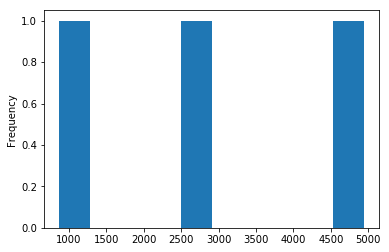

In [103]:
final_df.groupby(['country']).count()['device_uuid'].plot(kind='hist');

In [104]:
final_df.groupby(['user_registered']).mean()

,feature1,feature2,feature3
user_registered,,,
False,6.930481,5.544385,4.158289
True,6.893628,5.514902,4.136177


In [107]:
final_df.head()

,device_uuid,date,feature1,feature2,feature3,user_registered,platform,country
0,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-06-01,10,8.0,6.0,True,Android,NL
1,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-07-01,1,0.8,0.6,True,Android,NL
2,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-08-01,2,1.6,1.2,True,Android,NL
3,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-09-01,13,10.4,7.8,True,Android,NL
4,001aa2ab-3705-4a5e-aa82-d69fc20e77a2,2016-10-01,13,10.4,7.8,True,Android,NL


In [110]:
len(final_df['device_uuid'].unique())

910

In [112]:
final_df.to_csv('generating_user_behavioral_data.csv')

### Random code

In [ ]:
# device_uuid_data[seg_feature_name]
# int(device_seg_feature_values_df['platform'].index.values)
device_seg_feature_values_df['platform'][int(device_seg_feature_values_df['platform'].index.values)]

In [ ]:
for index, row in sample_df.iterrows():
    new_sample_df = pd.DataFrame
    
    if index == 0:
            churner = False
            
    if row['app_usage'] == 0:
        churner = True
    
    if churner == True:
        # None
        sample_df.loc[index, 'app_usage'] = 0

sample_df# df['Col1_0_prev'] = df.groupby('User')['Col1_0'].shift()
user_data['prev_device_uuid'] = user_data['device_uuid'].shift(1)

In [ ]:
start_month = pd.to_datetime('2016-01-01')
add_month = relativedelta(months=+1)
user_data['date'] = start_month

for index, row in user_data.iterrows():
    
    if row['device_uuid'] == row['prev_device_uuid']:
        row['date'] += add_month
        # print(str(row['device_uuid']) + "    " + str(row['prev_device_uuid']))
    
    
    """
    
    if row['device_uuid'] == row['prev_device_uuid'] or row['prev_device_uuid'] == None:
        month += add_month
        row['date']  = month
    else:
        month = start_month
        row['date'] = month
        
        
    """
    

In [ ]:
for index, row in sample_df.iterrows():
    new_sample_df = pd.DataFrame
    
    if index == 0:
            churner = False
            
    if row['app_usage'] == 0:
        churner = True
    
    if churner == True:
        # None
        sample_df.loc[index, 'app_usage'] = 0

sample_df